In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

so_survey = pd.read_csv("https://assets.datacamp.com/production/repositories/3752/datasets/19699a2441073ad6459bf5e3e17690e2cae86cf1/Combined_DS_v10.csv")

In [7]:
so_numeric_df = so_survey.dropna()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00"
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00"
5,2/9/18 19:09,Some college/university study without earning ...,120000.0,Yes,Russia,7.0,Git,39,2,Male,"120,000.00"
7,10/16/18 23:36,Some college/university study without earning ...,250000.0,Yes,France,7.0,Git,24,2,Female,"250,000.00"
17,8/21/18 10:48,Master's degree (MA. MS. M.Eng.. MBA. etc.),51408.0,Yes,USA,9.0,Git;Subversion,55,1,Male,"$51,408.00"


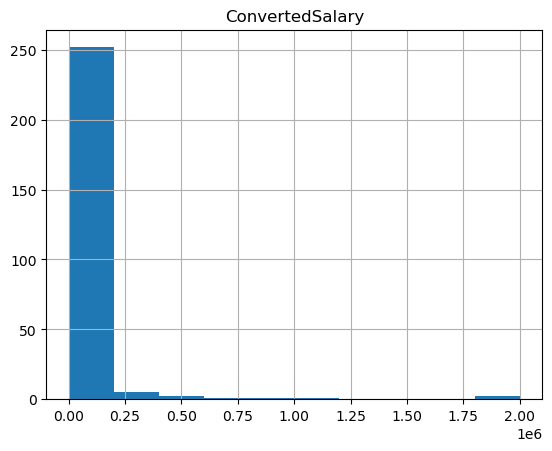

<Figure size 640x480 with 0 Axes>

In [13]:
quantile = so_numeric_df['ConvertedSalary'].quantile(0.95)

# Trim the outliers
trimmed_df = so_numeric_df[so_numeric_df['ConvertedSalary'] < quantile]

# The original histogram
so_numeric_df[['ConvertedSalary']].hist()
plt.show()
plt.clf()


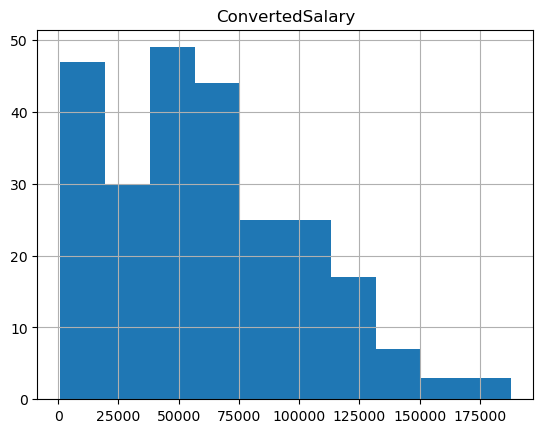

In [15]:
# The trimmed histogram
trimmed_df[['ConvertedSalary']].hist()
plt.show()

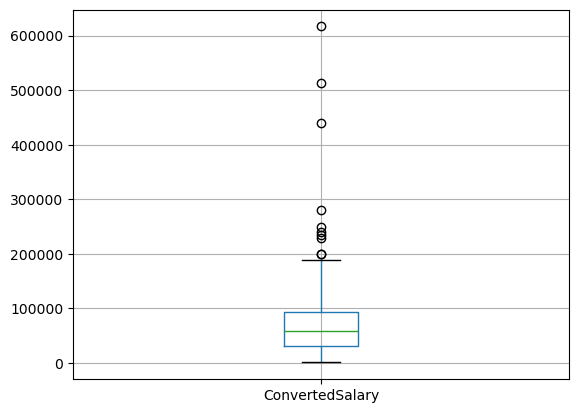

In [19]:
# Now we'll use a more statistically robust method of removing outliers by using the Standard Deviation and Mean

# Find the mean and standard dev
std = so_numeric_df['ConvertedSalary'].std()
mean = so_numeric_df['ConvertedSalary'].mean()

# Calculate the cutoff
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off

# Trim the outliers
trimmed_df = so_numeric_df[(so_numeric_df['ConvertedSalary'] < upper) & (so_numeric_df['ConvertedSalary'] > lower)]

# The trimmed box plot
trimmed_df[['ConvertedSalary']].boxplot()
plt.show()

In [23]:
# Using StandardScaler to scale data

# Import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# split dataset
so_train_numeric, so_test_numeric = train_test_split(so_numeric_df, test_size = 0.2)


# Apply a standard scaler to the data
SS_scaler = StandardScaler()

# Fit the standard scaler to the data
SS_scaler.fit(so_train_numeric[['Age']])

# Transform the test data using the fitted scaler
so_test_numeric['Age_ss'] = SS_scaler.transform(so_test_numeric[['Age']])
print(so_test_numeric[['Age', 'Age_ss']].head())

     Age    Age_ss
61    18 -1.418200
857   20 -1.264151
276   55  1.431707
993   28 -0.647955
708   46  0.738486
